January 22nd, 2021

***
$\mathbf{\text{Sophie Courtemanche-Martel}}$<br>
$\mathbf{\text{INSY 695}}$<br>
$\mathbf{\text{Assignment 1}}$<br>
***

### SetUp

In [1]:
#Importing packages
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd
import pandas_profiling
import sklearn

#For visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly

### Get the data

In [6]:
#Importing the dataset
attrition_df = pd.read_csv(r"C:\Users\Sophie\Downloads\attrition.csv")

In [7]:
#Sample of 5 columns of the dataset
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
#Information of the database and it's attributes
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Data Description:

+ Age; Age of employee
+ Attrition; (Yes/No) Whether an employee retire/resigns
+ BusinessTravel; Frequency of business travel
+ DailyRate: Daily rates of production
+ Department: Company department
+ DistanceFromHome: Distance from the employees home
+ Education: Education level 
+ Education field: Education speciality (ie life sciencecs, medical, technical etc)
+ Employee Count: Unary (to drop)
+ Employee Number: Employee ID
+ Environemnt satisfaction: Likert value for work environment satisfaction
+ Gender: Male/Female
+ HourlyRate: Hourly rate of salary
+ JobInvolvement: Levels of job involvement (low, medium, high, very high)
+ JobLevel: Levels of job in company (1,2,3,4)
+ JobRole: Job title
+ JobSatisfaction: Likert scale of job satisfaction
+ MaritalStatus: Single/Married/Divorced
+ MonthlyIncome: TARGET variable
+ MonthlyRate: unknown description - to be dropped
+ NumberCompaniesWorked: Number of companies worked in the past
+ Over 18: Y/N
+ OverTime: Yes/No
+ PercentSalaryHike: Increase in salary since start
+ PerformanceRating: Scale of rating of performance (low, good, excellent, outstanding) 
+ RelationshipSatisfaction: Low, medium, high, very high
+ StandardHours: Unary - to drop
+ TotalWorkingYears: Total working years
+ TrainningTime: Total training time
+ WorkLifeExperience: Categorical values of worklife experience
+ YearsAtCompany: Years spent working at company
+ YearsinCurrPosition: Years spent in current position
+ YearsSinceLastPromotion: Years since the last promotion
+ YearsWithCurrManager: Years with current manager
---

In [9]:
#Statistical description of all the columns
attrition_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
##COMMENTING OUT SO IT DOESNT RUN EVERY TIME NOTEBOOK RESTARTS

#profile = attrition_df.profile_report(title = 'Pandas Profiling Report')
#profile.to_file(output_file = 'A1_pandas_profile_report.html')

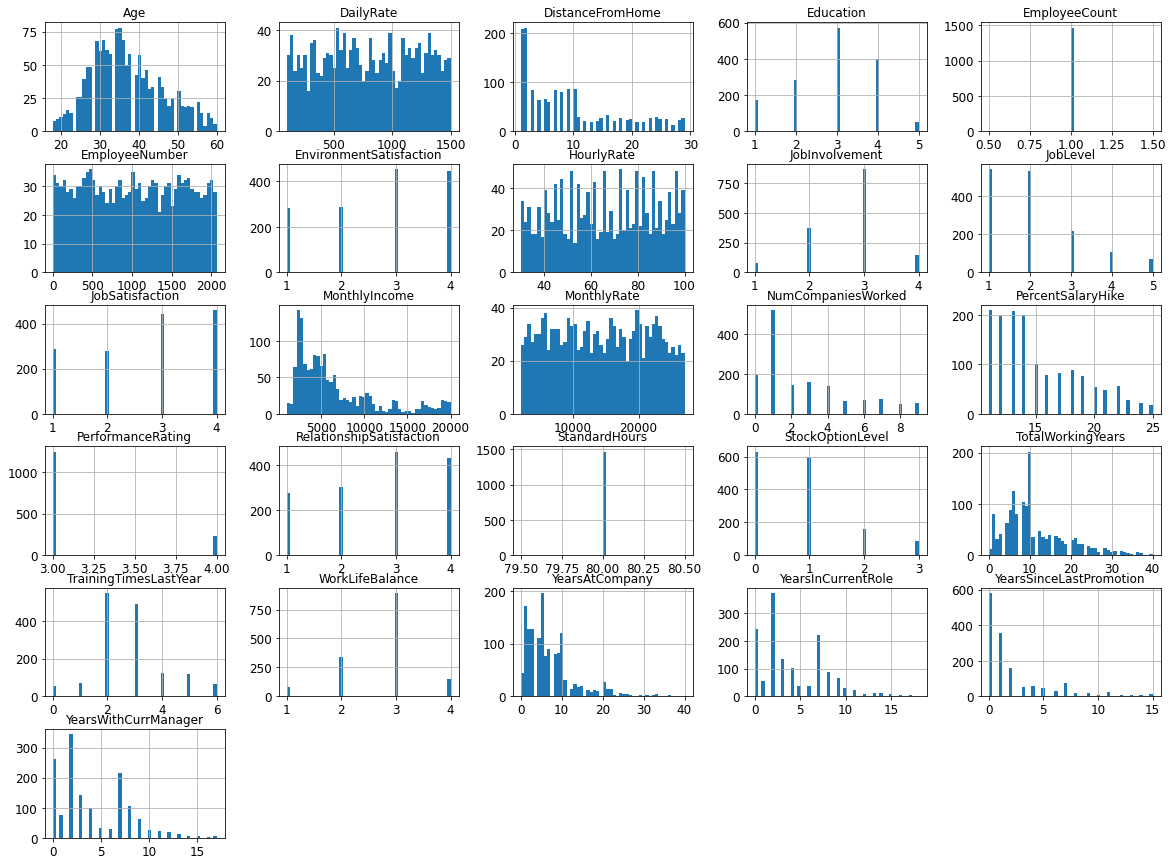

In [11]:
import matplotlib.pyplot as plt
attrition_df.hist(bins=50, figsize=(20,15))
plt.show()

## Data Preparation 

In [12]:
# to make this notebook's output identical at every run
np.random.seed(123)

#### Splitting the data into train and test



In [13]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(attrition_df, 0.2)
len(train_set)

1176

In [15]:
len(test_set)

294

In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

#Function to split data into train and test and adding new ids
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
#Implementation of test_set_check() 
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [18]:
#Implementation that supports any hash function compatible with both python versions
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [19]:
#Adding an index column 
attrition_with_id = attrition_df.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(attrition_with_id, 0.2, "index")

In [20]:
test_set.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
11,11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,...,4,80,0,10,3,3,9,5,0,8
20,20,24,No,Non-Travel,673,Research & Development,11,2,Other,1,...,4,80,1,5,5,2,4,2,1,3
23,23,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,...,4,80,0,0,6,3,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(attrition_df, test_size=0.2, random_state=42)

In [37]:
test_set.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,...,4,80,0,6,4,3,5,4,1,3
184,53,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,...,3,80,2,5,3,3,4,2,1,3
1222,24,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,...,3,80,1,1,2,3,1,0,0,0
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,3,80,1,25,2,3,1,0,0,0
220,36,No,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,...,4,80,0,16,3,4,13,11,3,7


##### Focus on one continuous variable, Number of Companies worked

In [38]:
fig = px.histogram(attrition_df, x="NumCompaniesWorked")
fig.show()

In [39]:
attrition_df['NumCompaniesWorked_cat'] = pd.cut(attrition_df['NumCompaniesWorked'],
                               bins=[0., 1.5, 3.0, 4.5, 5., 6., np.inf],
                               labels=[1, 2, 3, 4, 5,6,])

In [40]:
attrition_df['NumCompaniesWorked_cat'].value_counts()

1    521
2    305
6    175
3    139
5     70
4     63
Name: NumCompaniesWorked_cat, dtype: int64

In [41]:
fig = px.bar(attrition_df, x="NumCompaniesWorked_cat")
fig.show()

In [43]:
#removing NA values (see comment below)
attrition_df = attrition_df.dropna()
attrition_df = attrition_df.reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(attrition_df, attrition_df["NumCompaniesWorked_cat"]):
    strat_train_set = attrition_df.loc[train_index]
    strat_test_set = attrition_df.loc[test_index]
    
    ##if this is run before removing NA values, this is the following error: Input contains NaN, infinity or a value too large for dtype('float64').
    #thus, i will remove NAs before running this chunck of code

In [44]:
strat_test_set["NumCompaniesWorked_cat"].value_counts() / len(strat_test_set)

1    0.407843
2    0.239216
6    0.137255
3    0.109804
5    0.054902
4    0.050980
Name: NumCompaniesWorked_cat, dtype: float64

In [45]:
attrition_df["NumCompaniesWorked_cat"].value_counts() / len(attrition_df)

1    0.409269
2    0.239592
6    0.137471
3    0.109191
5    0.054988
4    0.049489
Name: NumCompaniesWorked_cat, dtype: float64

In [46]:
def num_companies_cat_proportions(data):
    return data["NumCompaniesWorked_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(attrition_df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": num_companies_cat_proportions(attrition_df),
    "Stratified": num_companies_cat_proportions(strat_test_set),
    "Random": num_companies_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [47]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.409269,0.407843,0.431373,5.400625,-0.348500
2,0.239592,0.239216,0.243137,1.479910,-0.156863
3,0.109191,0.109804,0.094118,-13.804486,0.561433
4,0.049489,0.050980,0.039216,-20.759415,3.012761
5,0.054988,0.054902,0.035294,-35.815126,-0.156863
6,0.137471,0.137255,0.156863,14.106443,-0.156863


In [48]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("NumCompaniesWorked_cat", axis=1, inplace=True)

---

### Data Exploration: discovery and visualization - gaining insights

For best practices, we will only look at data from the training set and only touch on the test data for the final model evaluation
##### Categorical Data

Features that are categorical in the dataset:
1. Attrition 
2. Business Travel
3. Department
4. Education Field
5. Gender
6. Job Role
7. Marital Status
8. Over 18
9. Overtime


In [49]:
attrition = strat_train_set.copy()
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
766,35,No,Non-Travel,1212,Sales,8,2,Marketing,1,1243,...,2,80,1,16,6,2,13,2,4,12
220,29,No,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,...,4,80,1,10,2,3,3,2,0,2
1263,40,No,Travel_Rarely,1194,Research & Development,2,4,Medical,1,2051,...,2,80,3,20,2,3,5,3,0,2
482,32,No,Travel_Frequently,430,Research & Development,24,4,Life Sciences,1,772,...,4,80,2,10,2,3,10,8,4,7
960,26,No,Travel_Rarely,474,Research & Development,3,3,Life Sciences,1,1581,...,1,80,0,1,5,3,1,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195B1700208>,
      dtype=object)

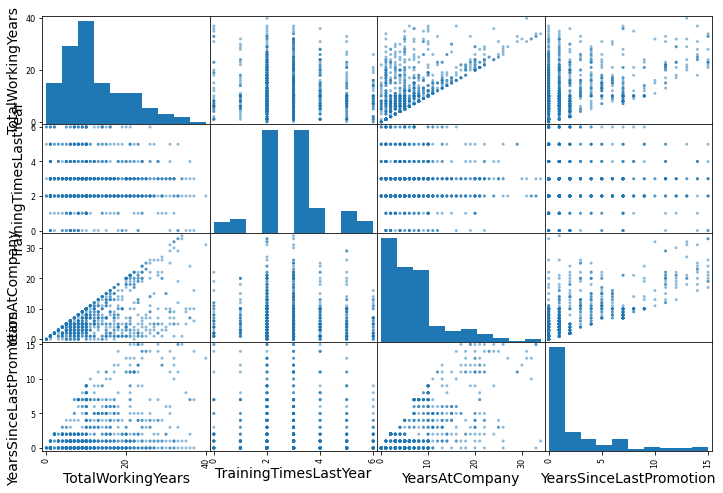

In [50]:
## Looking at work related metrics such as years in position, total work years, years at company
from pandas.plotting import scatter_matrix
attributes = ["TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",
              "YearsSinceLastPromotion"]
scatter_matrix(attrition[attributes], figsize=(12, 8))


In [51]:
fig = px.histogram(attrition, x="Attrition")
fig.show()

In [52]:
fig = px.histogram(attrition, x="BusinessTravel")
fig.show()

In [53]:
fig = px.histogram(attrition, x="Department")
fig.show()

In [54]:
fig = px.histogram(attrition, x="EducationField")
fig.show()

In [55]:
fig = px.histogram(attrition, x="Gender")
fig.show()

In [56]:
fig = px.histogram(attrition, x="JobRole")
fig.show()

In [57]:
fig = px.histogram(attrition, x="MaritalStatus")
fig.show()

In [58]:
fig = px.histogram(attrition, x="OverTime")
fig.show()

---
### Outlier Detection

Using isolation forest from sklearn ensemble to detect anomalies with a contamination rate of 0.01 on the basis of monthly income. This is the target variable we want to predict in the linear regression. 

In [60]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01),max_features=1.0, random_state = 0)
model.fit(attrition[['MonthlyIncome']])

#identify anomalies
attrition['score']=model.decision_function(attrition[['MonthlyIncome']])
attrition['anomaly']=model.predict(attrition[['MonthlyIncome']])
attrition.head(20)

#print out index of observations that are anomalies
anomaly=attrition.loc[attrition['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly_index)

print('number of anomalies: ', len(anomaly_index))

[151, 1076, 441, 142, 491, 793, 1185, 663, 648, 632, 1162]
number of anomalies:  11


We can see that there were 11 anomalies detected, which will be removed before further analysis is conducted

In [61]:
#removing observations that were identified as anomalies 
attrition = attrition[~attrition.index.isin(anomaly_index)]

---
### Data Preprocessing 

Lowercasing, removing non-alphanumeric, repairing, removing unknown characters

In [62]:
attrition['BusinessTravel'].value_counts()

Travel_Rarely        711
Travel_Frequently    194
Non-Travel           102
Name: BusinessTravel, dtype: int64

In [63]:
#Removing repeated words and special characters (non alphanumeric)
spec_chars = ["Travel_", "!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^",
              "`","{","|","}","~","–", " & ", " Development"]
for char in spec_chars:
    attrition['BusinessTravel'] = attrition['BusinessTravel'].str.replace(char, '')
    
attrition['BusinessTravel'].head()

766      NonTravel
220         Rarely
1263        Rarely
482     Frequently
960         Rarely
Name: BusinessTravel, dtype: object

In [64]:
attrition['Department'].value_counts()

Research & Development    679
Sales                     287
Human Resources            41
Name: Department, dtype: int64

In [65]:
#Simplifying a category and removing non alphanumeric
for char in spec_chars:
    attrition['Department'] = attrition['Department'].str.replace(char, '')
    
attrition['Department'].head()

766         Sales
220         Sales
1263    Research 
482     Research 
960     Research 
Name: Department, dtype: object

In [66]:
#Lowercasing columns with upper cases
attrition["BusinessTravel"].str.lower() 
attrition["Department"].str.lower()
attrition["EducationField"].str.lower()
attrition["Gender"].str.lower()
attrition["JobRole"].str.lower()
attrition["MaritalStatus"].str.lower()

766      married
220     divorced
1263     married
482      married
960      married
          ...   
22       married
68        single
553      married
989     divorced
1182      single
Name: MaritalStatus, Length: 1007, dtype: object

---
### Feature Selection

Droping attributes, identifying collinearity and dimension reduction

Unary variables are dropped. Unary variables take only a single value accross all observations, so a unary variable is not so much a variable as it is a constant. 

In [67]:
attrition['EmployeeCount'].value_counts()
#unary variable (same for all observations)

1    1007
Name: EmployeeCount, dtype: int64

In [68]:
attrition['StandardHours'].value_counts()
#unary variable (same for all observations)

80    1007
Name: StandardHours, dtype: int64

In [69]:
attrition['Over18'].value_counts()

Y    1007
Name: Over18, dtype: int64

In [70]:
#First, dropping the attributes that do not contribute to useful information for the regression task

#Droping employee count as it is a unary variable
attrition = attrition.drop(['EmployeeCount'], axis = 1)

#Droping employee number (ID field)
attrition = attrition.drop(['EmployeeNumber'], axis = 1)

#Droping Standard Hours as it is a unary variable
attrition = attrition.drop(['StandardHours'], axis = 1)

#Droping Over18 as it is a unary variable
attrition = attrition.drop(['Over18'], axis = 1)

#Droping Hourly Rate as it is directly related to monthly rate (target)
attrition = attrition.drop(['HourlyRate'], axis = 1)


#### Collinearity

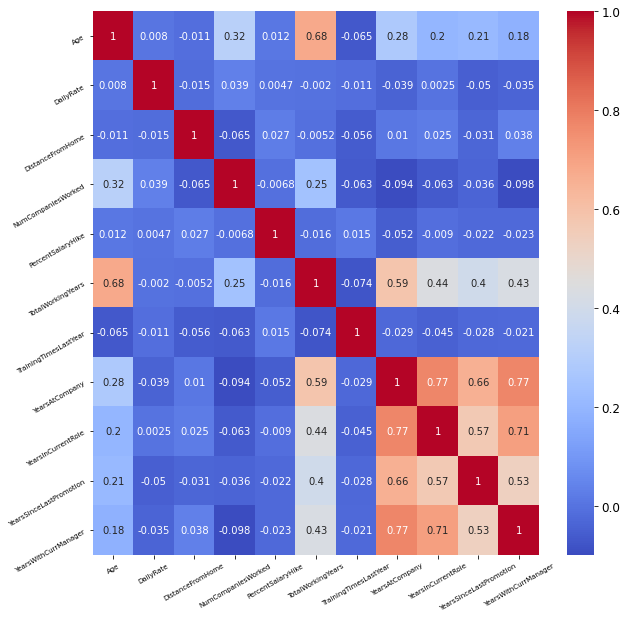

In [71]:
#Heatmap with only continuous features as categorical features might skew the results
import seaborn as sns

cont_variables = attrition[['Age', 
                              'DailyRate',
                              'DistanceFromHome',
                              'NumCompaniesWorked',
                              'PercentSalaryHike',
                              'TotalWorkingYears',
                              'TrainingTimesLastYear',
                              'YearsAtCompany',
                              'YearsInCurrentRole',
                              'YearsSinceLastPromotion',
                              'YearsWithCurrManager']]
plt.figure(figsize = (10,10))
s = sns.heatmap(cont_variables.corr(), annot = True, cmap = "coolwarm")
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.show()

From the heatmap, we can see that the following continuous variables are correlated (correlation coefficent > 0.70 as a rule of thumb)
1. Years in current role - Years at Company (corr = 0.77)
2. Years with Curr Manager - Years at company (corr = 0.77)
3. Years with Curr Manager - Years in current role (corr = 0.71)

To avoid issues related with multicolinearity, the variable YearsWithCurrManager and YearsinCurrentRole will be removed

In [72]:
#droping years with current manager
attrition = attrition.drop(['YearsWithCurrManager'], axis = 1)

#droping years in current role
attrition = attrition.drop(['YearsInCurrentRole'], axis = 1)

In [73]:
#droping monthly rate as it is closely correlated to monthly income
attrition = attrition.drop(['MonthlyRate'], axis = 1)

In [74]:
attrition = attrition.drop(['DailyRate'], axis = 1)

In [75]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 766 to 1182
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1007 non-null   int64  
 1   Attrition                 1007 non-null   object 
 2   BusinessTravel            1007 non-null   object 
 3   Department                1007 non-null   object 
 4   DistanceFromHome          1007 non-null   int64  
 5   Education                 1007 non-null   int64  
 6   EducationField            1007 non-null   object 
 7   EnvironmentSatisfaction   1007 non-null   int64  
 8   Gender                    1007 non-null   object 
 9   JobInvolvement            1007 non-null   int64  
 10  JobLevel                  1007 non-null   int64  
 11  JobRole                   1007 non-null   object 
 12  JobSatisfaction           1007 non-null   int64  
 13  MaritalStatus             1007 non-null   object 
 14  Monthl

#### Dimension reduction - PCA

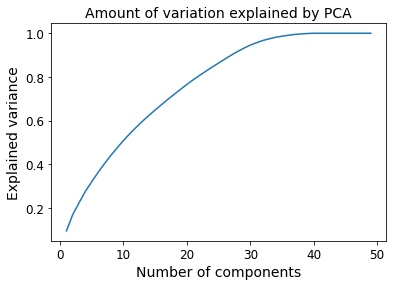

In [76]:
# 1) create dummy variables
A_dummies = pd.get_dummies(attrition, columns = ['Attrition',
                                                    'BusinessTravel',
                                                    'Department',
                                                    'EducationField',
                                                    'Gender',
                                                    'JobRole',
                                                   'MaritalStatus',
                                                   'OverTime'])

# 2) seperate into X and Y
X = A_dummies.loc[:, A_dummies.columns != 'MonthlyIncome']
y = A_dummies.MonthlyIncome

# 3) Transforming the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fitting PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_std)

explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

+ number of components explaining 80% of variance: around 20
+ number of components explaining 90% of variance: around 28
+ number of components explaining 99% of variance: around 35

---
### Preparing the data for Machine Learning Algorithm

#### Encoding Categorical variables

In [77]:
#Latest state of the dataset - after collinear variables removed 
attrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 766 to 1182
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1007 non-null   int64  
 1   Attrition                 1007 non-null   object 
 2   BusinessTravel            1007 non-null   object 
 3   Department                1007 non-null   object 
 4   DistanceFromHome          1007 non-null   int64  
 5   Education                 1007 non-null   int64  
 6   EducationField            1007 non-null   object 
 7   EnvironmentSatisfaction   1007 non-null   int64  
 8   Gender                    1007 non-null   object 
 9   JobInvolvement            1007 non-null   int64  
 10  JobLevel                  1007 non-null   int64  
 11  JobRole                   1007 non-null   object 
 12  JobSatisfaction           1007 non-null   int64  
 13  MaritalStatus             1007 non-null   object 
 14  Monthl

In [78]:
#Encoding Yes/No (binary) variables into One hot encoded variables
attrition['Attrition'] = np.where(attrition['Attrition'].str.contains('Yes'), 1, 0)
attrition['OverTime'] = np.where(attrition['OverTime'].str.contains('Yes'), 1, 0)

In [79]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,score,anomaly
766,35,0,NonTravel,Sales,8,2,Marketing,3,Female,2,...,3,2,1,16,6,2,13,4,0.160238,1
220,29,0,Rarely,Sales,20,2,Marketing,4,Male,3,...,3,4,1,10,2,3,3,0,0.187772,1
1263,40,0,Rarely,Research,2,4,Medical,3,Female,3,...,3,2,3,20,2,3,5,0,0.160969,1
482,32,0,Frequently,Research,24,4,Life Sciences,1,Male,3,...,3,4,2,10,2,3,10,4,0.228776,1
960,26,0,Rarely,Research,3,3,Life Sciences,1,Female,3,...,4,1,0,1,5,3,1,0,0.195425,1


The current categorical variables are well balanced thus there is no need to re-balance the categories into fewer/more general categories

In [80]:
#Encoding categorical variables
attrition = attrition.drop('score', axis = 1)
attrition = attrition.drop('anomaly', axis = 1)
Attrition = pd.get_dummies(attrition, columns = ['BusinessTravel',
                                                    'Attrition',
                                                    'Department',
                                                    'EducationField',
                                                    'JobRole',
                                                    'MaritalStatus',
                                                   'Gender'])


In [81]:
#Establishing X and Y variables

X = Attrition.drop('MonthlyIncome', axis = 1)
Y = Attrition[['MonthlyIncome']]
X.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
766,35,8,2,3,2,3,4,4,1,11,...,0,0,0,1,0,0,1,0,1,0
220,29,20,2,4,3,2,4,2,0,14,...,0,0,0,1,0,1,0,0,0,1
1263,40,2,4,3,3,1,3,2,0,14,...,0,0,1,0,0,0,1,0,1,0
482,32,24,4,1,3,2,4,1,0,15,...,0,0,0,0,0,0,1,0,0,1
960,26,3,3,1,3,1,4,1,0,21,...,0,0,1,0,0,0,1,0,1,0


---

## Train and compare models

#### Split data into train and test

In [82]:
#Splitting data one time, for all the model in order to allow for comparison of performance
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

#### Standardize features

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#### Building a function to compute MSE for quick comparison between linear regression models

1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. LASSO 
5. Ridge Regression

In [84]:
#Import models' packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


#Regression Models
regression_models = [['Linear Regression',LinearRegression()], 
                     ['RF regressor',RandomForestRegressor()], 
                     ['GBT',GradientBoostingRegressor()],
                     ['LASSO', Lasso()],
                     ['Ridge', Ridge()]]
                     

MSEs = []
Models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Lasso', 'Ridge']

for name, model in regression_models: 
    print('Model = ', name)
    model.fit(X_train, y_train.values.ravel())
    y_predictor = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    MSE = mean_squared_error(y_test, y_predictor)
    MSEs.append(MSE)
    print("MSE: ", MSE)
    print("-" * 19)
    
    
    

Model =  Linear Regression
MSE:  1067473.7270878763
-------------------
Model =  RF regressor
MSE:  920475.3309161717
-------------------
Model =  GBT
MSE:  843146.4687613414
-------------------
Model =  LASSO
MSE:  1062000.6122581977
-------------------
Model =  Ridge
MSE:  1068774.1312706769
-------------------


In [85]:
#simple visualization to look at the results 
d = {'Model' : Models, 'MSE': MSEs}
MSE_vis = pd.DataFrame(d)
fig = px.bar(MSE_vis, x="Model", y="MSE", color = 'MSE', title="MSE of linear regression models")
fig.show()

From this first run, we can see that GBT has the lowest MSE, followed by the Random Forest regressor. We will perform cross validation on all the models in a similar fashion for a better evaluation of the MSEs.

#### Cross validation Scores

K-fold cross validation with 5 folds will be performed on the linear regression models

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

CV_scores_mean = []
CV_scores_std = []
scores_raw = []

for name,model in regression_models:
    folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(model, X_train, y_train.values.ravel(), scoring='r2', cv=folds)
    scores_raw.append(scores)
    avg_score = scores.mean()
    std_score = scores.std()
    CV_scores_mean.append(avg_score)
    CV_scores_std.append(std_score)


In [87]:
CVK = {'Model' : Models, 'CV_mean': CV_scores_mean, 'CV_Std': CV_scores_std}
CV_kfolds = pd.DataFrame(CVK)
CV_kfolds

,Model,CV_mean,CV_Std
0,Linear Regression,0.933020,0.005861
1,Random Forest Regressor,0.945920,0.006160
2,Gradient Boosting Regressor,0.945123,0.002738
3,Lasso,0.933579,0.005410
4,Ridge,0.933230,0.005573


In [88]:
#Visualization summarizing the cross validation results
fig = go.Figure()
fig.add_trace(go.Bar(
    x=Models,
    y=CV_scores_mean,
    name='CV score mean',
    marker_color='mediumaquamarine'
))
fig.add_trace(go.Bar(
    x=Models,
    y=CV_scores_std,
    name='CV score standard deviation',
    marker_color='yellowgreen'
))

fig.update_layout(barmode='group')
fig.show()

### Tuning best performing models
The two following models will be tuned using Grid Search CV in conjunction with Kfold validation and Recursive feature elimination (RFE) in order to determine the best performing model;
1. Gradient boosting regressor
2. Random Forest Regressor

##### I - Gradient Boosting Regressor 

In [89]:
# FIRST MODEL : GBT

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(10, 30))}]

# set up the model and the estimator
from sklearn.feature_selection import RFE
GBT = GradientBoostingRegressor()
GBT.fit(X_train, y_train.values.ravel())
rfe = RFE(GBT)             

# set up GridSearchCV()
from sklearn.model_selection import GridSearchCV
model_cv_GBT = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True)      

# fit the model
model_cv_GBT.fit(X_train, y_train)   

C:\Users\Sophie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Sophie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Sophie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Sophie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Sophie\anaconda3\lib\site-packages\sklearn\utils\valida

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=GradientBoostingRegressor()),
             param_grid=[{'n_features_to_select': [10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29]}],
             return_train_score=True, scoring='r2')

In [90]:
# cv results
cv_results = pd.DataFrame(model_cv_GBT.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.289974,0.635433,0.006200,0.002313,10,{'n_features_to_select': 10},0.946918,0.941375,0.950214,0.940773,...,0.945980,0.004211,4,0.969039,0.968872,0.969611,0.969399,0.968607,0.969105,0.000360
1,3.752307,0.027709,0.003784,0.000743,11,{'n_features_to_select': 11},0.947519,0.941542,0.948853,0.939288,...,0.945410,0.004205,10,0.969852,0.969246,0.969392,0.970879,0.969218,0.969718,0.000624
2,3.713270,0.039550,0.003990,0.000642,12,{'n_features_to_select': 12},0.947051,0.941076,0.949365,0.940917,...,0.945723,0.003995,7,0.970305,0.969831,0.969268,0.972213,0.969939,0.970311,0.001007
3,3.622864,0.031695,0.003790,0.000399,13,{'n_features_to_select': 13},0.948856,0.942797,0.948485,0.941592,...,0.945918,0.003081,6,0.971011,0.970946,0.970101,0.971269,0.971718,0.971009,0.000529
4,3.590383,0.046589,0.003989,0.000609,14,{'n_features_to_select': 14},0.946915,0.945710,0.948168,0.940164,...,0.946386,0.003569,1,0.971492,0.971460,0.971335,0.973086,0.972505,0.971976,0.000696


In [91]:
trace2 = go.Scatter(
    y=cv_results.mean_test_score,
    x=cv_results.param_n_features_to_select,
    mode = 'lines',
    name = 'test score')

trace3 = go.Scatter(
    y=cv_results.mean_train_score,
    x=cv_results.param_n_features_to_select,
    mode = 'lines',
    name = 'train score')


data = [trace2, trace3]
layout = go.Layout(title = 'Optimal number of features based on R-squared scores',
                  yaxis={"title": 'R-squared'},
                  xaxis={"title": 'N features'})
figure = go.Figure(data = data, layout = layout)
figure.show()

From the visual evidence, we can see that around 20 feautres, the scores plateau thus we will use 24 as out optimal value of number of features to build the final model 

In [107]:
# final GBT model - on training data
n_features_optimal = 20

GBT = GradientBoostingRegressor()
model_GBT = GBT.fit(X_train, y_train.values.ravel())

rfe = RFE(GBT, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train.values.ravel())

# predict prices of X_test
y_pred = GBT.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9668926588698513


In [108]:
#calculate MSE of final model - on training data 
MSE = mean_squared_error(y_test, y_pred)
MSE

841677.0067581544

The test score of R2 is very close to the mean test score on the k-folds (0.945123). Thus, the mean scores obtained through cross alidation are a good estimate of the test scores 

---
##### II - Random Forest Regressor

For the random forest regressor model, the alpha parameter will be tuned. This parameter is responsible for regularization; improving the conditioning of the problem and reducing the variance. 

In [94]:
#SECOND MODEL : ridge model


# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# specify range of hyperparameters
ridge_params = {'alpha':[10,5,2,1.7, 1.5,1, 0]}

# set up the model and the estimator
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
ridge_model = Ridge()
         

# set up GridSearchCV()
from sklearn.model_selection import GridSearchCV
model_cv2 = GridSearchCV(ridge_model, 
                        param_grid = ridge_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True)      

# fit the model
model_cv2.fit(X_train, y_train)   

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [10, 5, 2, 1.7, 1.5, 1, 0]},
             return_train_score=True, scoring='r2')

In [95]:
# cv results
cv_results = pd.DataFrame(model_cv2.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006383,0.002054,0.004388,0.001197,10,{'alpha': 10},0.928545,0.941528,0.936031,0.933940,...,0.933880,0.004734,1,0.944819,0.943023,0.943599,0.944301,0.944528,0.944054,0.000654
1,0.006988,0.001400,0.004986,0.000909,5,{'alpha': 5},0.927238,0.941475,0.936417,0.933798,...,0.933705,0.005029,2,0.945112,0.943262,0.943859,0.944546,0.944747,0.944305,0.000662
2,0.004979,0.000883,0.002994,0.000892,2,{'alpha': 2},0.925769,0.941355,0.936548,0.933608,...,0.933389,0.005393,3,0.945213,0.943339,0.943943,0.944626,0.944818,0.944388,0.000666
3,0.005579,0.001615,0.004390,0.001358,1.7,{'alpha': 1.7},0.925577,0.941338,0.936557,0.933583,...,0.933345,0.005443,4,0.945219,0.943344,0.943948,0.944630,0.944822,0.944393,0.000667
4,0.005984,0.000893,0.003799,0.000749,1.5,{'alpha': 1.5},0.925443,0.941327,0.936561,0.933566,...,0.933314,0.005478,5,0.945223,0.943346,0.943951,0.944633,0.944824,0.944395,0.000667
5,0.006389,0.002493,0.003591,0.001017,1,{'alpha': 1},0.925087,0.941297,0.936572,0.933521,...,0.933230,0.005573,6,0.945230,0.943351,0.943956,0.944638,0.944829,0.944401,0.000667
6,0.007689,0.003072,0.003406,0.000807,0,{'alpha': 0},0.908040,0.932515,0.916881,0.925832,...,0.920343,0.008310,7,0.936686,0.935532,0.920721,0.942171,0.935550,0.934132,0.007141


In [96]:
trace2 = go.Scatter(
    y=cv_results.mean_train_score,
    x=cv_results.param_alpha,
    mode = 'lines',
    name = 'test score')

trace3 = go.Scatter(
    y=cv_results.mean_test_score,
    x=cv_results.param_alpha,
    mode = 'lines',
    name = 'train score')


data = [trace2, trace3]
layout = go.Layout(title = 'Optimal number of features based on R-squared scores',
                  yaxis={"title": 'R-squared'},
                  xaxis={"title": 'alpha value'})
figure = go.Figure(data = data, layout = layout)
figure.show()

In [97]:
model_cv.best_score_

0.9338802414352629

In [98]:
model_cv.best_estimator_.alpha

10

In [99]:
#Final ridge model and MSE 
ridge_final= Ridge(alpha = 10, random_state = 42)
model_ridge = ridge_final.fit(X_train,y_train)
y_test_pred = model_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
mse

1083931.4344806054

We can see that even after hyperparameter tuning, the Ridge model is quite unstable as the MSE increased from the initial MSE calculated. We can conclude that the GBT model is the most stable and performant model

### Final model : Gradient Boosting Regressor
In order to evaluate the performance of the GBT model, we will use the intial test data and calculate the MSE with this "new" data.

Ideally, we would have a pipeline which would allow us to repeat the previous pre-processing steps on the test data but for the purpose of this assignment, we will manually repeat the pre-processing that was executed on the training data.

In [126]:
attritionTest = strat_test_set.copy()
attritionTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 164 to 1043
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       255 non-null    int64 
 1   Attrition                 255 non-null    object
 2   BusinessTravel            255 non-null    object
 3   DailyRate                 255 non-null    int64 
 4   Department                255 non-null    object
 5   DistanceFromHome          255 non-null    int64 
 6   Education                 255 non-null    int64 
 7   EducationField            255 non-null    object
 8   EmployeeCount             255 non-null    int64 
 9   EmployeeNumber            255 non-null    int64 
 10  EnvironmentSatisfaction   255 non-null    int64 
 11  Gender                    255 non-null    object
 12  HourlyRate                255 non-null    int64 
 13  JobInvolvement            255 non-null    int64 
 14  JobLevel               

In [127]:
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01),max_features=1.0, random_state = 0)
model.fit(attritionTest[['MonthlyIncome']])

#identify anomalies
attritionTest['score']=model.decision_function(attritionTest[['MonthlyIncome']])
attritionTest['anomaly']=model.predict(attritionTest[['MonthlyIncome']])
attrition.head(20)

#print out index of observations that are anomalies
anomaly=attritionTest.loc[attritionTest['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly_index)

print('number of anomalies: ', len(anomaly_index))

[735, 786, 651]
number of anomalies:  3


In [128]:
#removing observations that were identified as anomalies 
attritionTest = attritionTest[~attritionTest.index.isin(anomaly_index)]

In [129]:
attritionTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 164 to 1043
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       252 non-null    int64  
 1   Attrition                 252 non-null    object 
 2   BusinessTravel            252 non-null    object 
 3   DailyRate                 252 non-null    int64  
 4   Department                252 non-null    object 
 5   DistanceFromHome          252 non-null    int64  
 6   Education                 252 non-null    int64  
 7   EducationField            252 non-null    object 
 8   EmployeeCount             252 non-null    int64  
 9   EmployeeNumber            252 non-null    int64  
 10  EnvironmentSatisfaction   252 non-null    int64  
 11  Gender                    252 non-null    object 
 12  HourlyRate                252 non-null    int64  
 13  JobInvolvement            252 non-null    int64  
 14  JobLeve

In [130]:
#Removing repeated words and special characters (non alphanumeric)
spec_chars = ["Travel_", "!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^",
              "`","{","|","}","~","–", " & ", " Development"]
for char in spec_chars:
    attritionTest['BusinessTravel'] = attritionTest['BusinessTravel'].str.replace(char, '')
    

#Simplifying a category and removing non alphanumeric
for char in spec_chars:
    attritionTest['Department'] = attritionTest['Department'].str.replace(char, '')
    


#Lowercasing columns with upper cases
attritionTest["BusinessTravel"].str.lower() 
attritionTest["Department"].str.lower()
attritionTest["EducationField"].str.lower()
attritionTest["Gender"].str.lower()
attritionTest["JobRole"].str.lower()
attritionTest["MaritalStatus"].str.lower()


#First, dropping the attributes that do not contribute to useful information for the regression task

#Droping employee count as it is a unary variable
attritionTest = attritionTest.drop(['EmployeeCount'], axis = 1)

#Droping employee number (ID field)
attritionTest = attritionTest.drop(['EmployeeNumber'], axis = 1)

#Droping Standard Hours as it is a unary variable
attritionTest = attritionTest.drop(['StandardHours'], axis = 1)

#Droping Over18 as it is a unary variable
attritionTest = attritionTest.drop(['Over18'], axis = 1)

#Droping Hourly Rate as it is directly related to monthly rate (target)
attritionTest = attritionTest.drop(['HourlyRate'], axis = 1)

#droping years with current manager
attritionTest = attritionTest.drop(['YearsWithCurrManager'], axis = 1)

#droping years in current role
attritionTest = attritionTest.drop(['YearsInCurrentRole'], axis = 1)

#droping monthly rate as it is closely correlated to monthly income
attritionTest = attritionTest.drop(['MonthlyRate'], axis = 1)

#droping daily rate as it is closely correlated to monthly income
attritionTest = attritionTest.drop(['DailyRate'], axis = 1)

#droping daily rate as it is closely correlated to monthly income
attritionTest = attritionTest.drop(['score'], axis = 1)

#droping daily rate as it is closely correlated to monthly income
attritionTest = attritionTest.drop(['anomaly'], axis = 1)

#Encoding Yes/No (binary) variables into One hot encoded variables
attritionTest['Attrition'] = np.where(attritionTest['Attrition'].str.contains('Yes'), 1, 0)
attritionTest['OverTime'] = np.where(attritionTest['OverTime'].str.contains('Yes'), 1, 0)

In [131]:
#Encoding categorical variables
AttritionTest = pd.get_dummies(attritionTest, columns = ['BusinessTravel',
                                                    'Attrition',
                                                    'Department',
                                                    'EducationField',
                                                    'JobRole',
                                                    'MaritalStatus',
                                                   'Gender'])

In [132]:
#Establishing X and Y variables

X_test = AttritionTest.drop('MonthlyIncome', axis = 1)
Y_test = AttritionTest[['MonthlyIncome']]
X_test.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
164,27,9,3,4,3,1,2,1,0,16,...,0,0,1,0,0,0,0,1,1,0
363,19,2,2,1,2,1,4,1,0,12,...,0,0,0,0,0,0,0,1,0,1
359,26,23,3,1,3,1,4,1,0,22,...,0,0,1,0,0,1,0,0,1,0
310,33,5,3,4,3,1,3,1,1,13,...,0,0,0,0,1,0,0,1,1,0
252,37,9,3,2,3,1,4,1,1,12,...,0,0,1,0,0,0,1,0,0,1


In [133]:
#Final model evaluation - using GBT model established earlier
y_test_pred = model_GBT.predict(X_test)

# Calculate the mean squared error of the prediction
mse = mean_squared_error(Y_test, y_test_pred)
print('MSE of grading model - gradient boosting regressor: ', mse)

MSE of grading model - gradient boosting regressor:  38403528.22077185


###### Final results:
MSE of training model : 841677.0067581544
MSE of training model with test dataset: 38403528.22077185

We can see that the MSE of the training model was considerably lower compared to the MSE obtained once the model was exposed to "new" data (test data). Perhaps our model is not as stable or our test data might not be representative of the population's data.

Potential future improvements to this project:
+ try classifying attrition as opposed to predicting monthly salary
+ larger dataset : train the model on a wider set of observations
+ further feature selection using techniques such as Lasso regression, Tree based feature selection and feature importance
+ futher model fine tuning

#### References:

+ https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
+ https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset